In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Mall_Customers.xls')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
df.drop('CustomerID',axis='columns',inplace=True)

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<function matplotlib.pyplot.show(close=None, block=None)>

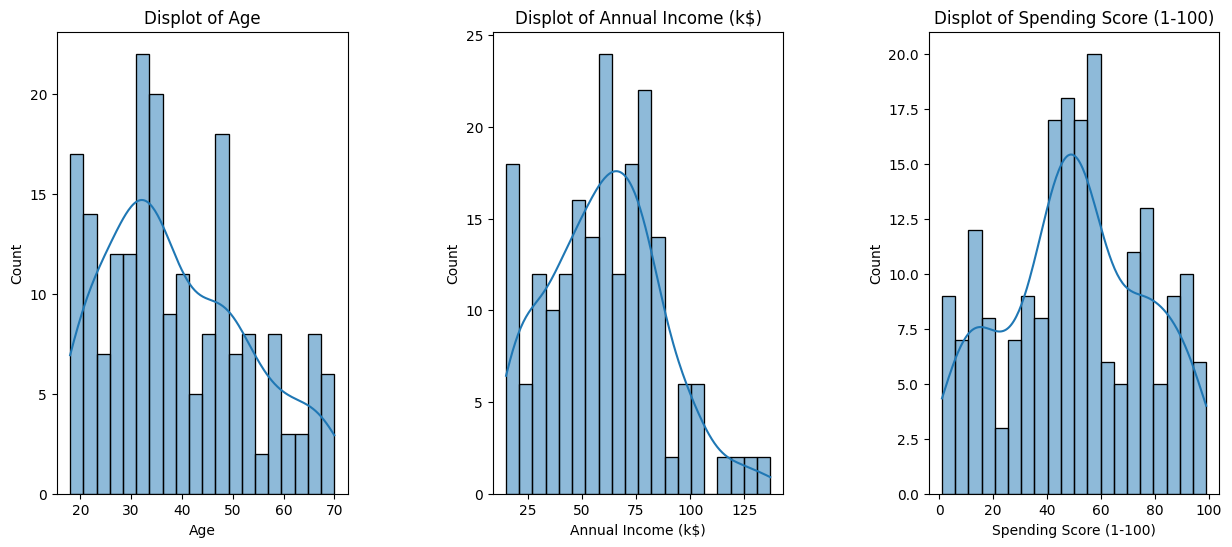

In [28]:
plt.figure(1,figsize=(15,6))
n=0
for x in df.columns[1:]:
  n +=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.histplot(df[x],bins=20,kde='True')
  plt.title(f'Displot of {x}')
plt.show

In [24]:
df.columns[1:]

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

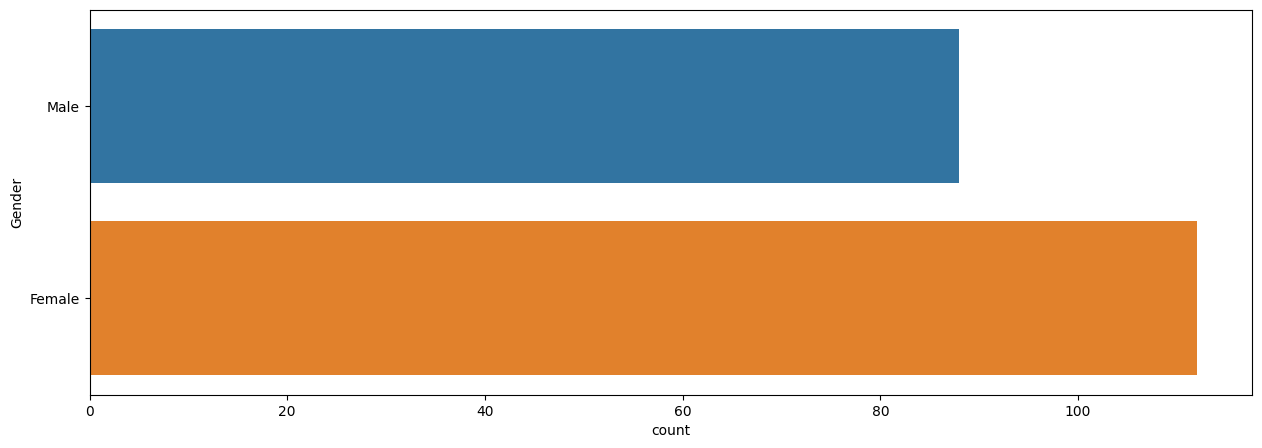

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

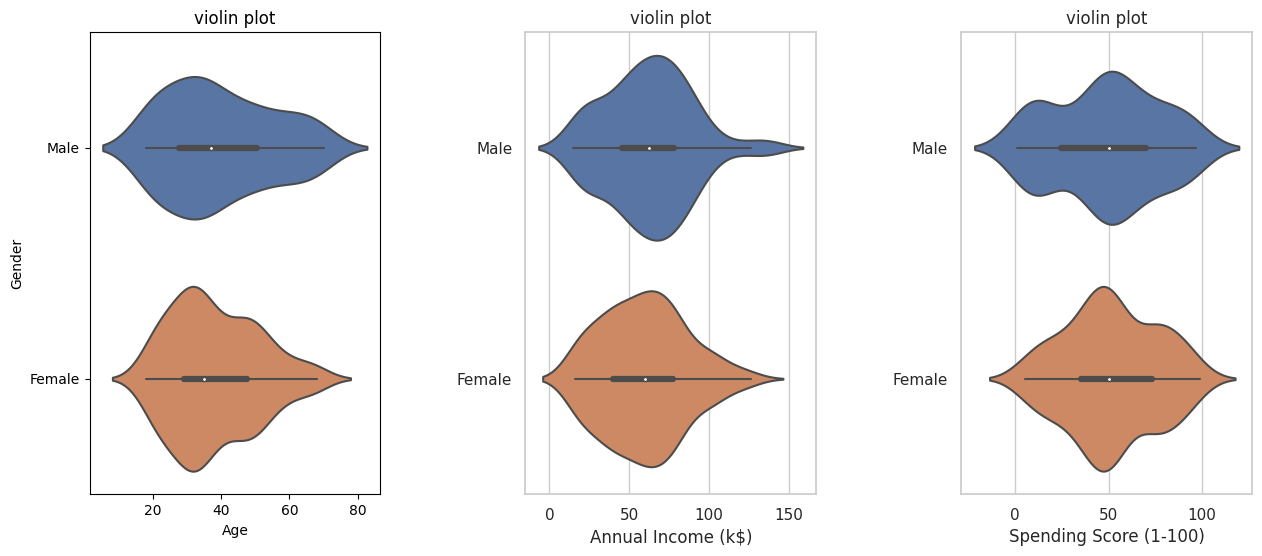

In [31]:
plt.figure(1,figsize=(15,6))
n=0
for x in df.columns[1:]:
  n +=1
  plt.subplot(1,3,n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=x,y='Gender',data=df)
  #sns.histplot(df[x],bins=20,kde='True')
  plt.ylabel('Gender'if n==1 else '' )
  plt.title('violin plot')
plt.show

<Axes: xlabel='Age', ylabel='Count'>

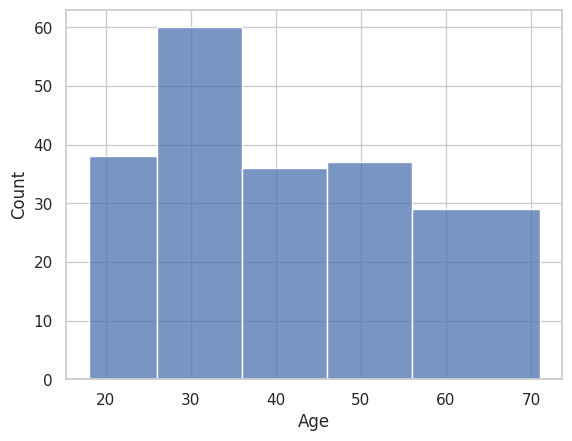

In [40]:
 age_bins = [18, 26, 36, 46, 56,71]
 sns.histplot(df['Age'],bins=age_bins)
 #plt.subplots_adjust(hspace=1)

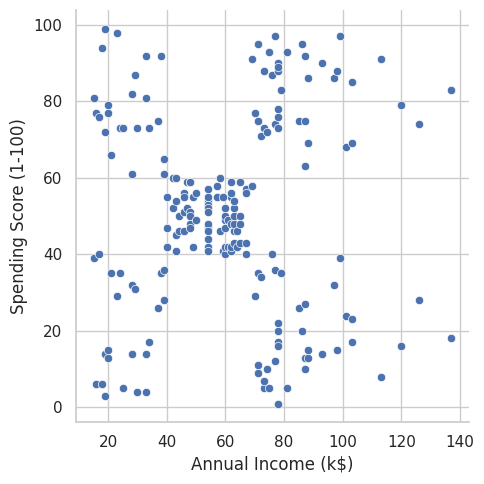

In [42]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

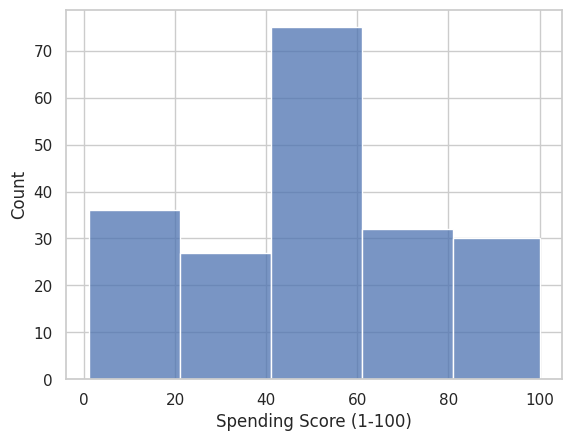

In [46]:
 age_bins = [1, 21, 41, 61, 81,100]
 sns.histplot(df['Spending Score (1-100)'],bins=age_bins)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

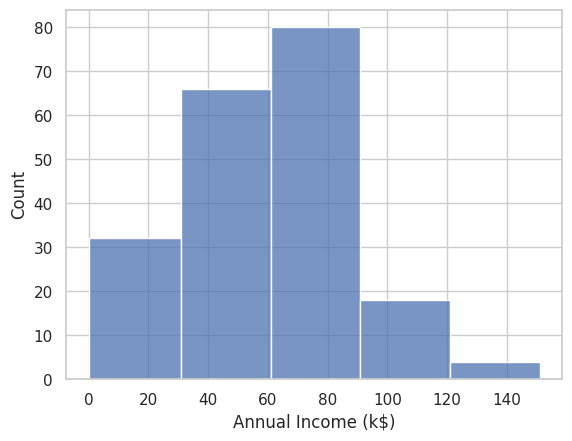

In [47]:
 age_bins = [0, 31, 61, 91, 121,151]
 sns.histplot(df['Annual Income (k$)'],bins=age_bins)

In [92]:
X1=df[['Age',"Spending Score (1-100)"]].values

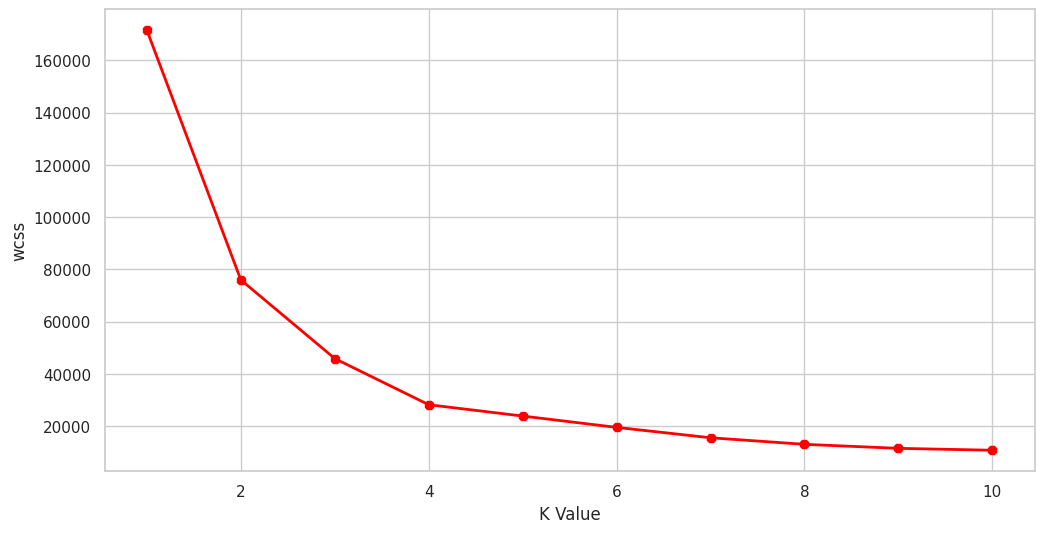

In [93]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k,n_init=10)
  Kmeans.fit(X1)
  wcss.append(Kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker='8')
plt.xlabel('K Value')
plt.ylabel('wcss')
plt.show()

In [94]:
kmeans =KMeans(n_clusters=4)
label =kmeans.fit_predict(X1)
print(label)

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


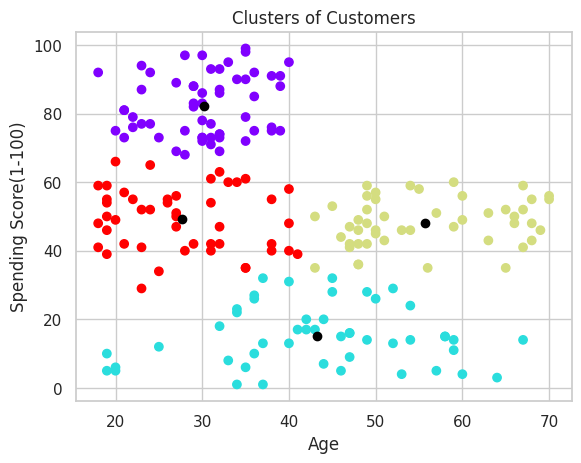

In [96]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

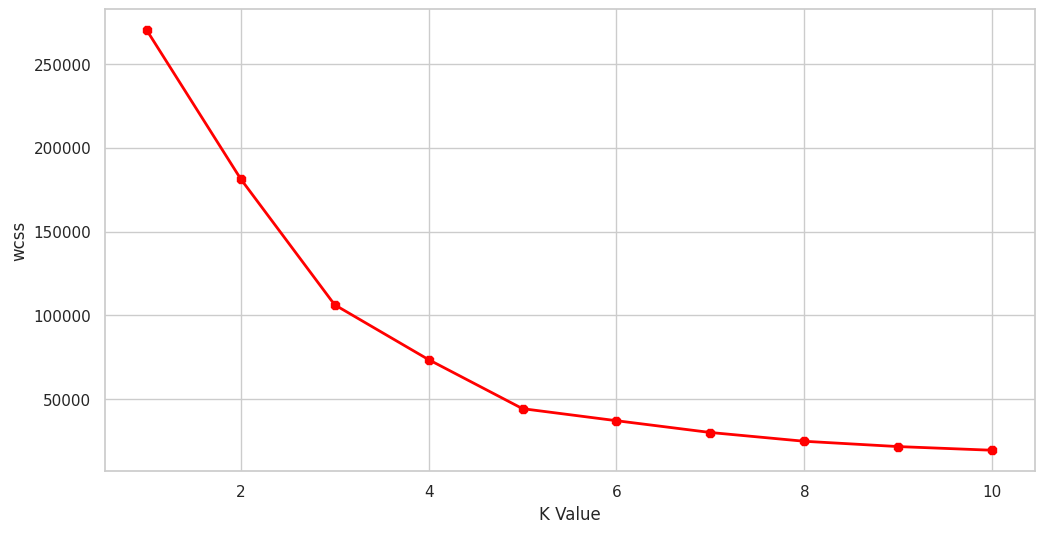

In [97]:
X2=df[['Annual Income (k$)',"Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k,n_init=10)
  Kmeans.fit(X2)
  wcss.append(Kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker='8')
plt.xlabel('K Value')
plt.ylabel('wcss')
plt.show()

In [98]:
kmeans =KMeans(n_clusters=5)
label =kmeans.fit_predict(X2)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 1 4 0 4 0 4 1 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [99]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


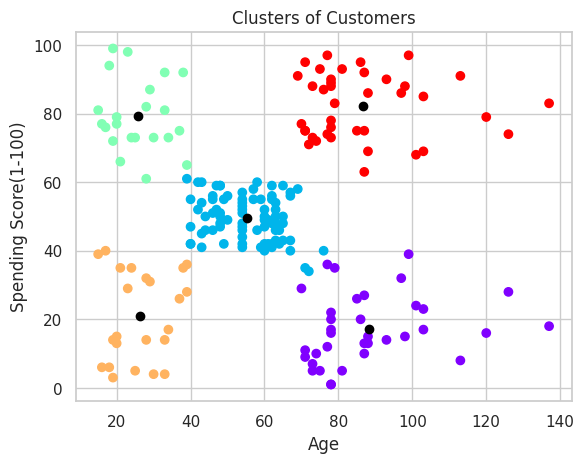

In [100]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

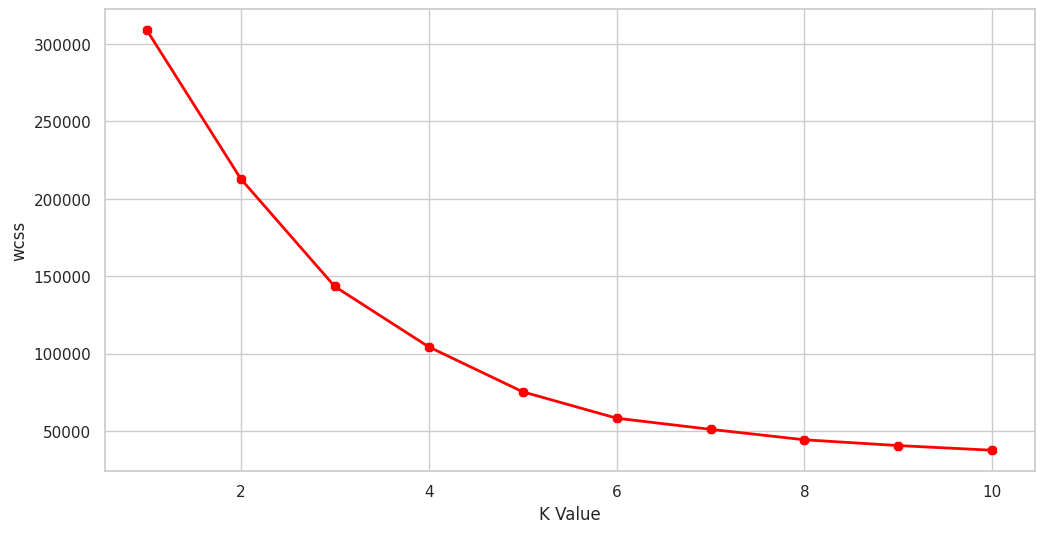

In [117]:
X3=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
wcss=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k,n_init=10)
  Kmeans.fit(X3)
  wcss.append(Kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker='8')
plt.xlabel('K Value')
plt.ylabel('wcss')
plt.show()

In [118]:
kmeans =KMeans(n_clusters=6)
label =kmeans.fit_predict(X3)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 1 4 3 5 3 4 1 5 5 5 1 5 5 1 1 1 1 1 5 1 1 5 1 1 1 5 1 1 5 5 1 1 1 1
 1 5 1 5 5 1 1 5 1 1 5 1 1 5 5 1 1 5 1 5 5 5 1 5 1 5 5 1 1 5 1 5 1 1 1 1 1
 5 5 5 5 5 1 1 1 1 5 5 5 2 5 2 0 2 0 2 0 2 5 2 0 2 0 2 0 2 0 2 5 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [119]:
clusters =kmeans.fit_predict(X3)
df['label']=clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [120]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,5
196,Female,45,126,28,1
197,Male,32,126,74,5
198,Male,32,137,18,1


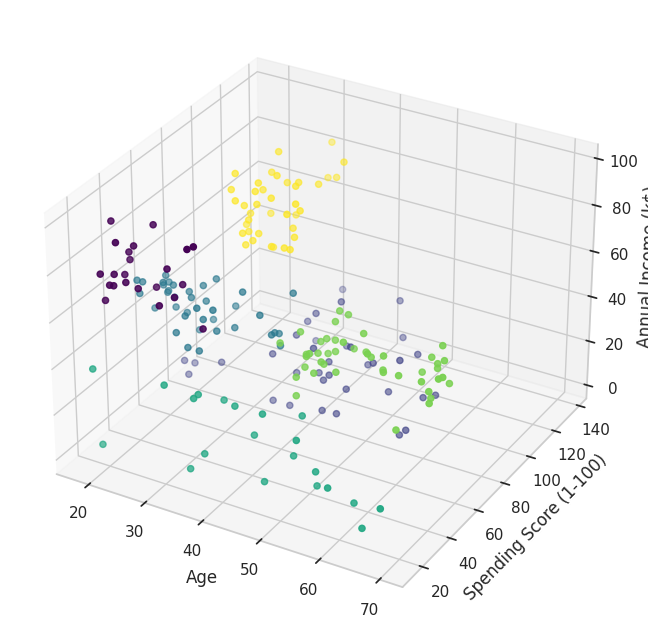

In [127]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X3 = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].values
#kmeans = KMeans(n_clusters=6)
#labels = kmeans.fit_predict(X3)
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')

plt.show()



In [128]:
import plotly.graph_objs as go

X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Scatter plot data
scatter = go.Scatter3d(
    x=X3[:, 0],
    y=X3[:, 2],
    z=X3[:, 1],
    mode='markers',
    marker=dict(
        size=5,
        color=clusters,  # Assuming clusters is defined and contains cluster labels
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income (k$)')
    )
)

# Create figure object and add scatter plot
fig = go.Figure(data=[scatter], layout=layout)

# Display the interactive 3D plot
fig.show()
